In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

from numpy import set_printoptions

from collections import Counter



In [3]:
data=pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
data.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [5]:
Drop=['dayfri','daymon','daysat','daysun','daythu','daytue','daywed','monthapr','monthaug','monthdec','monthfeb','monthjan','monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct','monthsep']
Forest_fires=data.drop(columns=Drop)
Forest_fires.head(3)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small


### Data Understanding

In [6]:
Forest_fires.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'size_category'],
      dtype='object')

+ month : Month of the year: 'jan' to 'dec'
+ day : Day of the week: 'mon' to 'sun'
+ FFMC : Fine Fuel Moisture Code index from the FWI system: 18.7 to 96.20
+ DMC : Duff Moisture Code index from the FWI system: 1.1 to 291.3
+ DC : Drought Code index from the FWI system: 7.9 to 860.6
+ ISI : Initial Spread Index from the FWI system: 0.0 to 56.10
+ temp : Temperature in Celsius degrees: 2.2 to 33.30
+ RH : Relative humidity in percentage: 15.0 to 100
+ wind : Wind speed in km/h: 0.40 to 9.40
+ rain : Outside rain in mm/m2 : 0.0 to 6.4
+ area : The burned area of the forest (in ha): 0.00 to 1090.84

In [7]:
Forest_fires.shape

(517, 12)

In [8]:
Forest_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    object 
dtypes: float64(8), int64(1), object(3)
memory usage: 48.6+ KB


In [9]:
Forest_fires.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
size_category    0
dtype: int64

In [10]:
Forest_fires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [11]:
# Identify numeric variables
numeric_variables=Forest_fires.select_dtypes(include=['int','float']).columns.tolist()

# Categorize numeric variables as discrete or continuous
discrete_variables=[]
continuous_variables=[]

for col in numeric_variables:
    unique_count=Forest_fires[col].nunique()
    if unique_count <=25:  # Set a threshold to categorize as discrete
        discrete_variables.append(col)
    else:
        continuous_variables.append(col)

# Print the categorized variables
print("Discrete Variables:", discrete_variables)
print("Continuous Variables:", continuous_variables)

Discrete Variables: ['wind', 'rain']
Continuous Variables: ['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']


In [12]:
# Identify categorical variables
categorical_variables=Forest_fires.select_dtypes(include=['object','bool']).columns.tolist()

print("Categorical Variables:", categorical_variables)

Categorical Variables: ['month', 'day', 'size_category']


In [13]:
# Compute frequency counts for each categorical column
frequency_counts={}
for col in categorical_variables:
    frequency_counts[col]=Forest_fires[col].value_counts()

# Print frequency counts for each categorical column
for col, counts in frequency_counts.items():
    print(f"Frequency count for '{col}' column:")
    print(counts)
    print()

Frequency count for 'month' column:
aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
apr      9
dec      9
jan      2
may      2
nov      1
Name: month, dtype: int64

Frequency count for 'day' column:
sun    95
fri    85
sat    84
mon    74
tue    64
thu    61
wed    54
Name: day, dtype: int64

Frequency count for 'size_category' column:
small    378
large    139
Name: size_category, dtype: int64



In [14]:
# Calculate cardinality for each categorical column
cardinality={}
for col in categorical_variables:
    cardinality[col]=Forest_fires[col].nunique()

# Print cardinality for each categorical column
for col, card in cardinality.items():
    print(f"Cardinality for '{col}' column:", card)

Cardinality for 'month' column: 12
Cardinality for 'day' column: 7
Cardinality for 'size_category' column: 2


In [15]:
Forest_fires.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000


### Data Visualization

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5]),
 [Text(0.5, 0, 'FFMC'),
  Text(1.5, 0, 'DMC'),
  Text(2.5, 0, 'DC'),
  Text(3.5, 0, 'ISI'),
  Text(4.5, 0, 'temp'),
  Text(5.5, 0, 'RH'),
  Text(6.5, 0, 'wind'),
  Text(7.5, 0, 'rain'),
  Text(8.5, 0, 'area')])

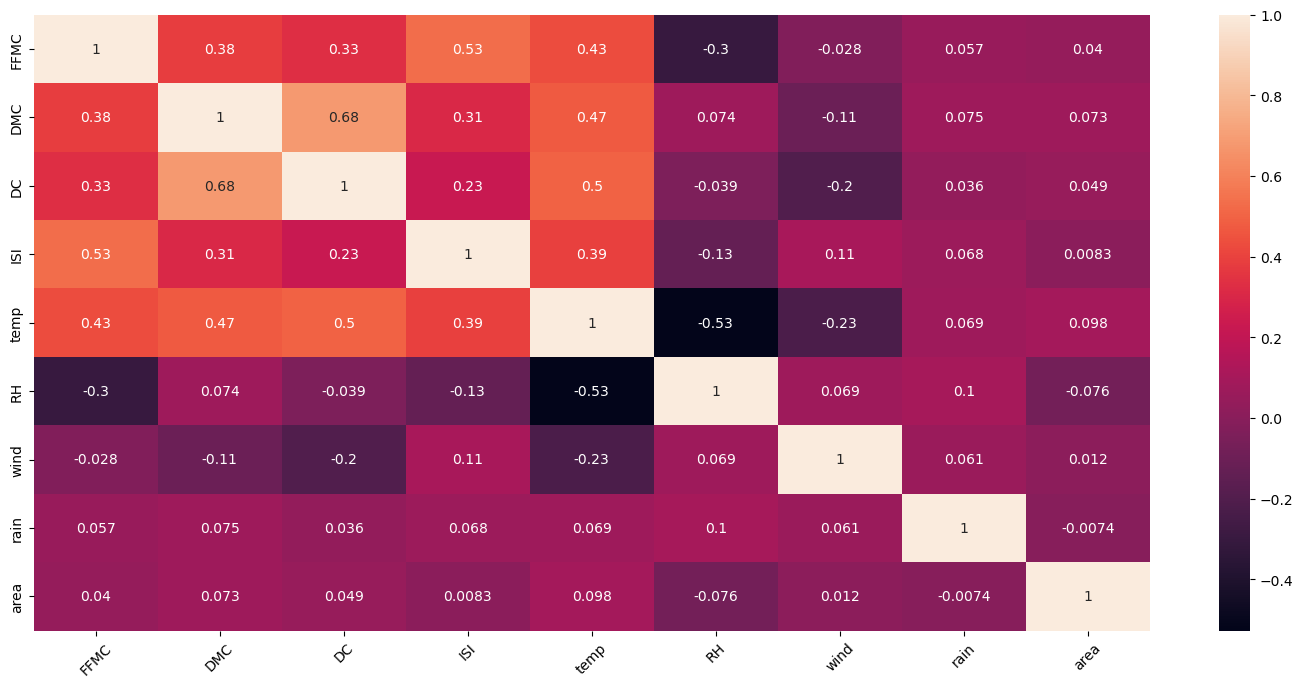

In [16]:
fig=plt.figure(figsize=(18,8))
sns.heatmap(Forest_fires.corr(),annot=True);
plt.xticks(rotation=45)

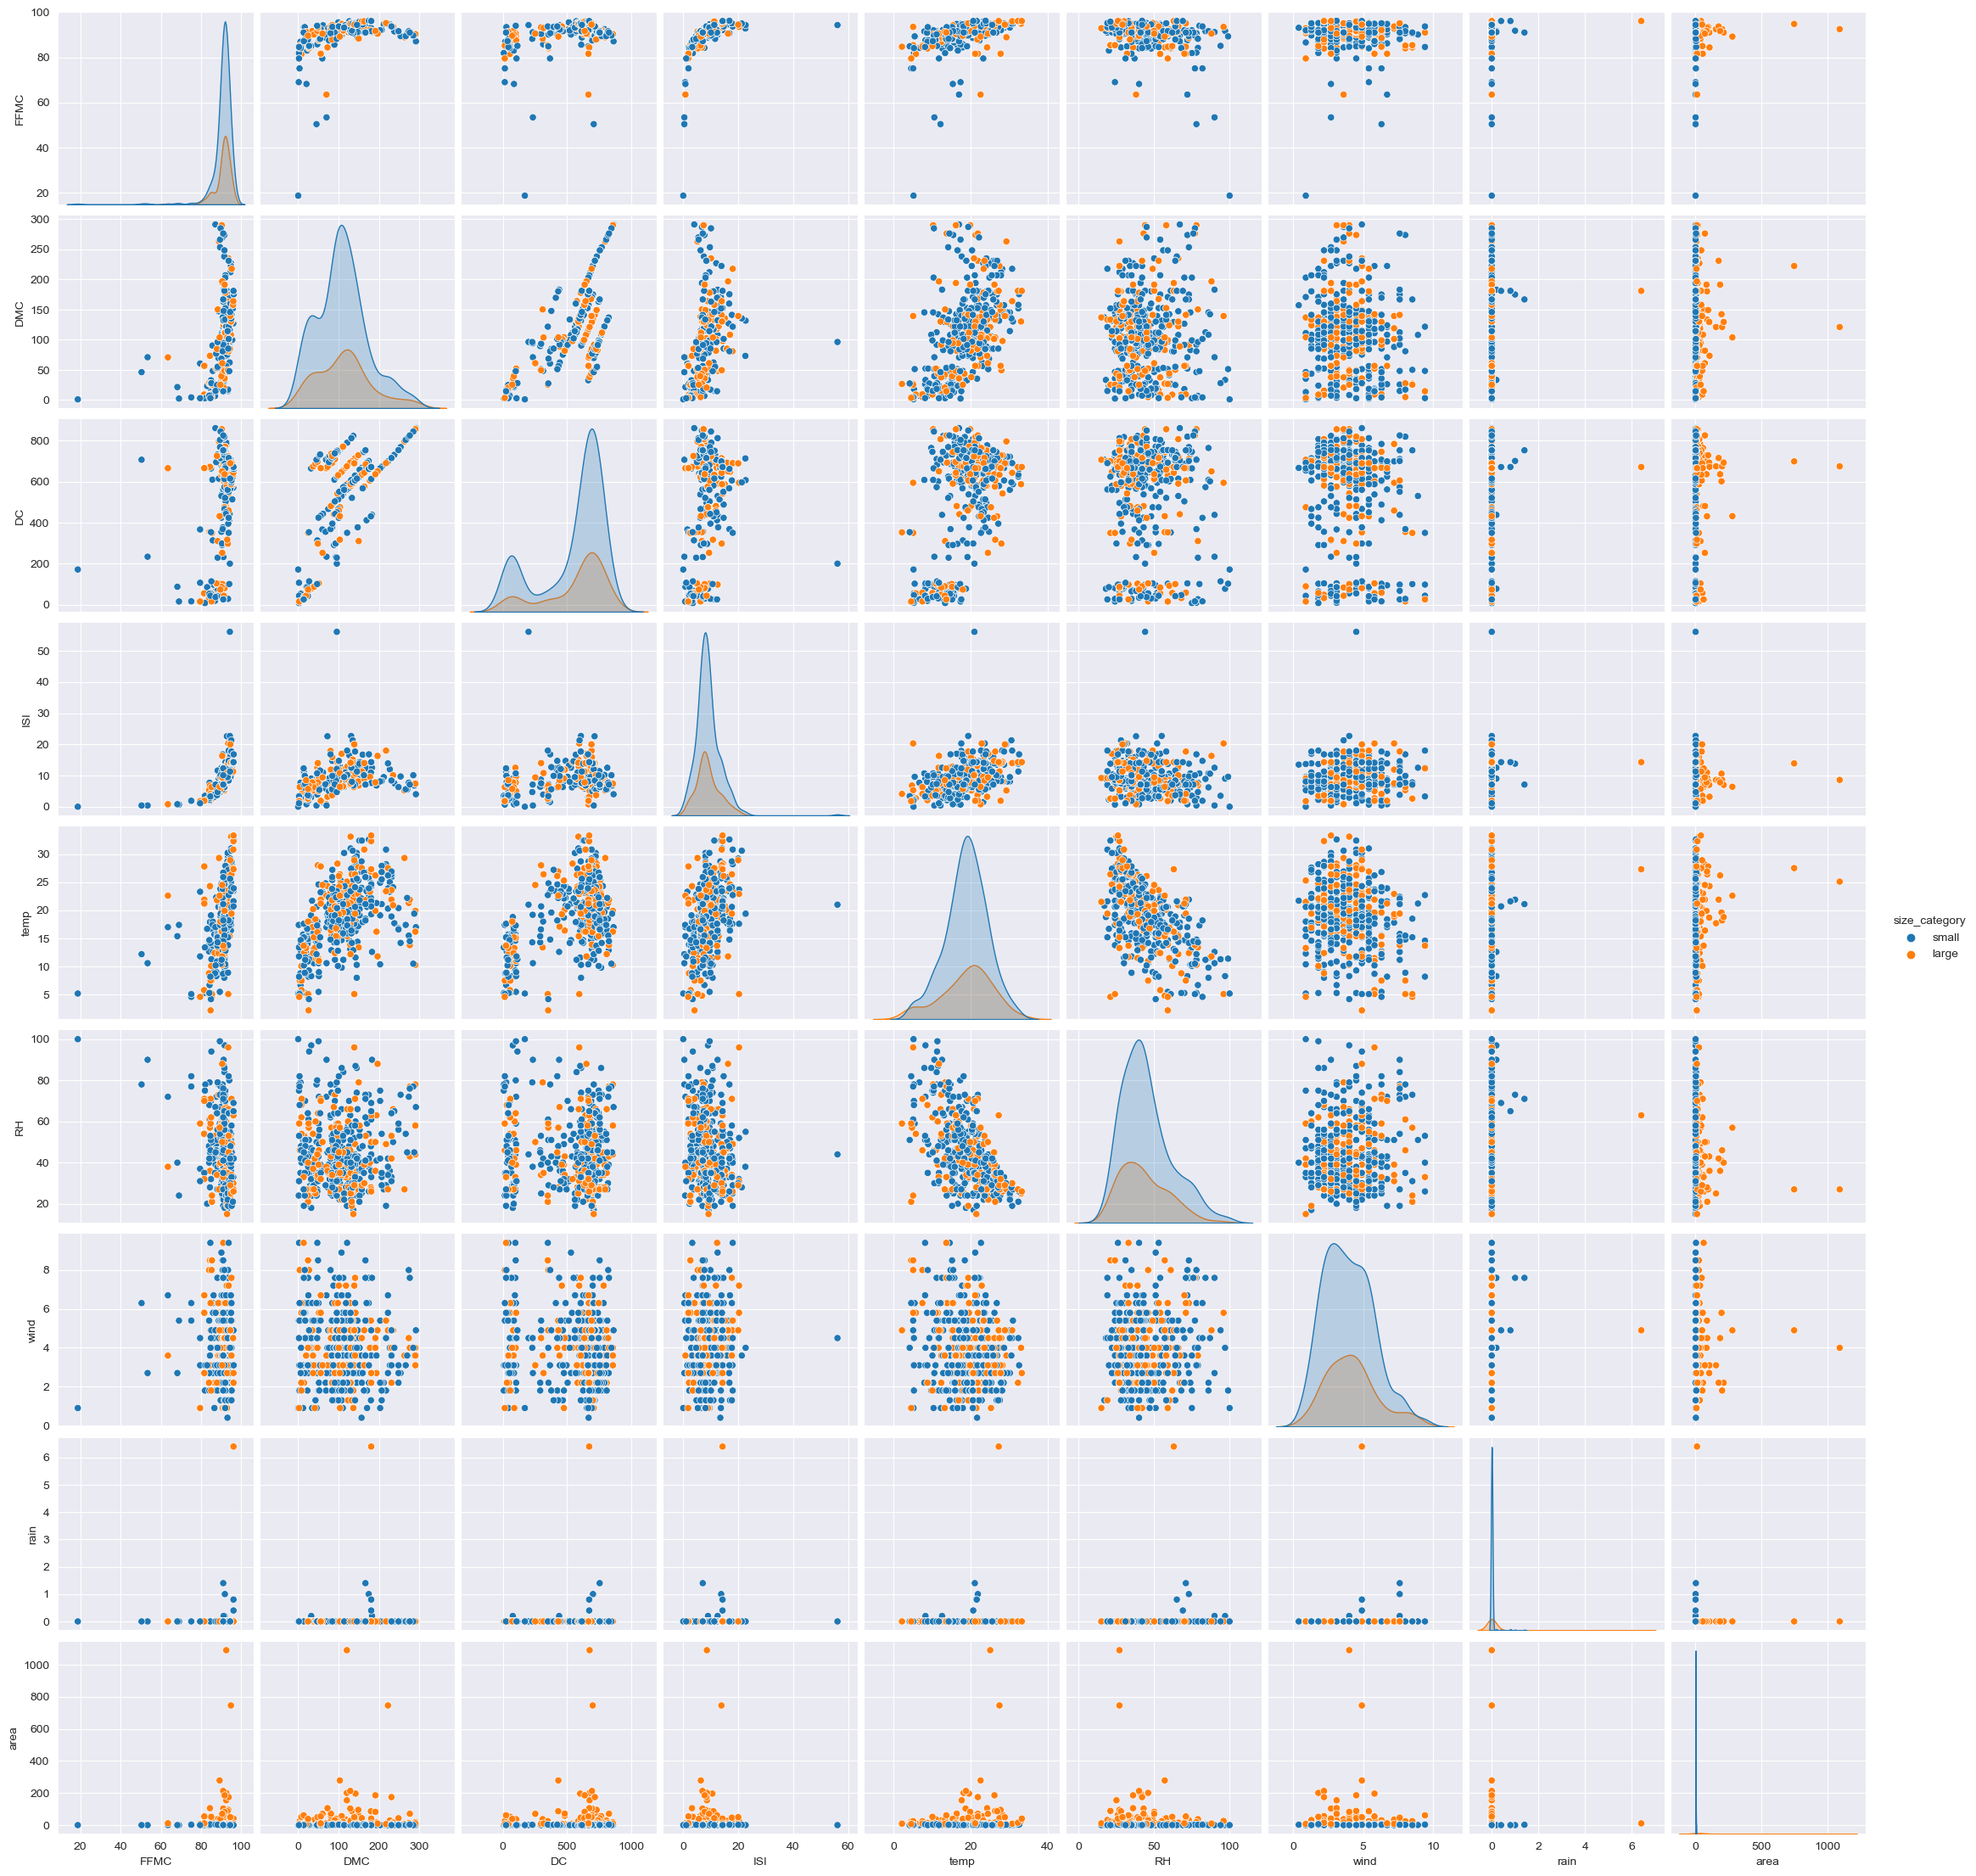

In [17]:
sns.set_style('darkgrid')
sns.pairplot(Forest_fires,hue='size_category')
plt.show()

+ DC & DMC have a positive correlation
+ RH & temp have a negative correlation

**Continuous Columns**

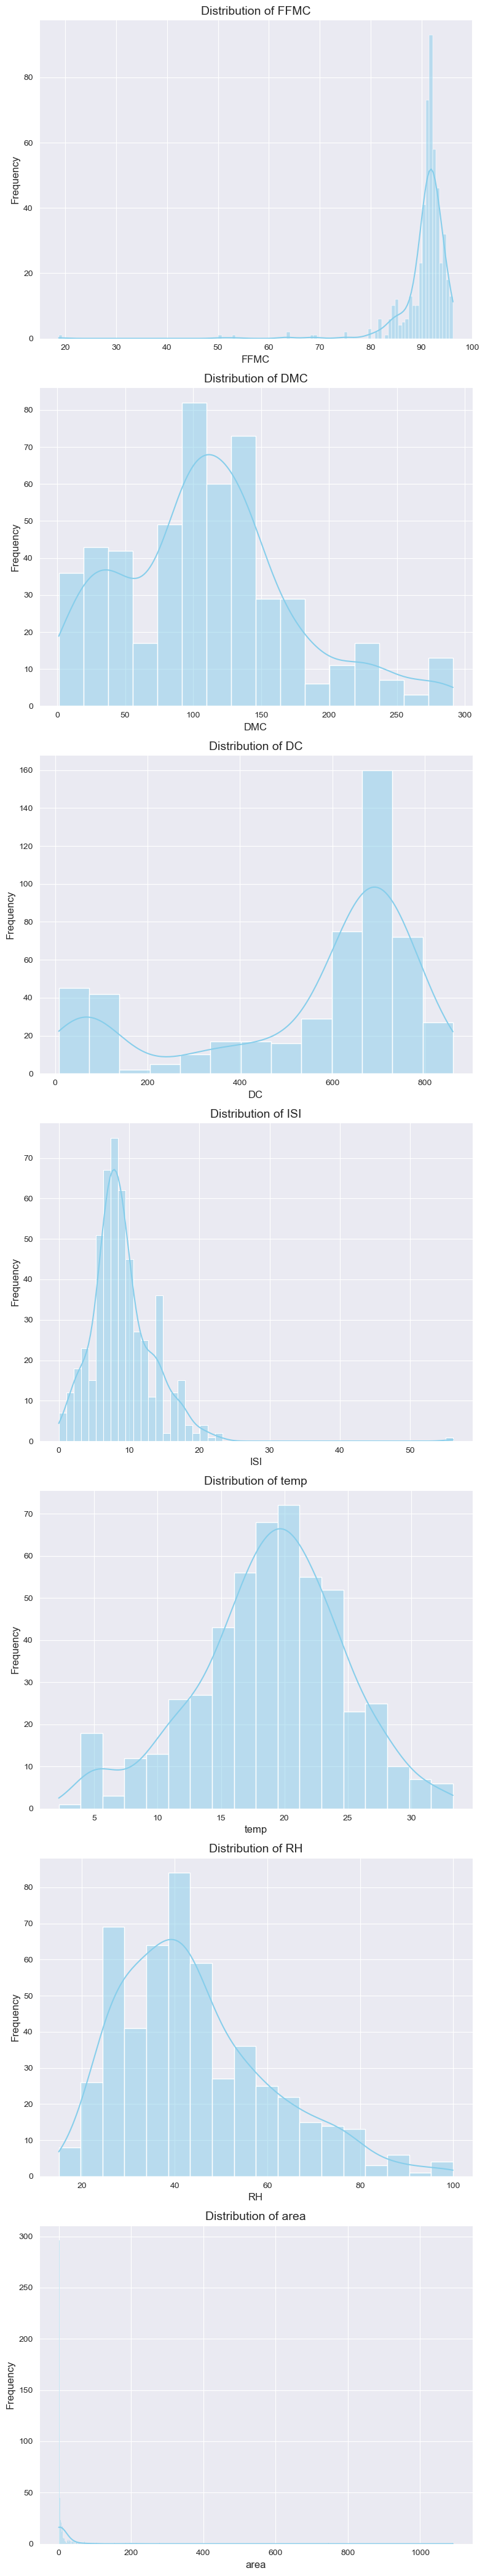

In [18]:
# Create subplots
fig,axes=plt.subplots(nrows=len(continuous_variables),figsize=(8,6 * len(continuous_variables)))

# Loop through each continuous column and create a distribution plot
for col,ax in zip(continuous_variables,axes):
    sns.histplot(Forest_fires[col],ax=ax,kde=True,color='skyblue')
    ax.set_title(f'Distribution of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Frequency',fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

The graph shows the distribution of continuous variables.

+ Symmetric Normal: temp
+ Left Skewed Normal: FFMC & DC
+ Right Skewed Normal: ISI,RH & area

**Discrete Columns**

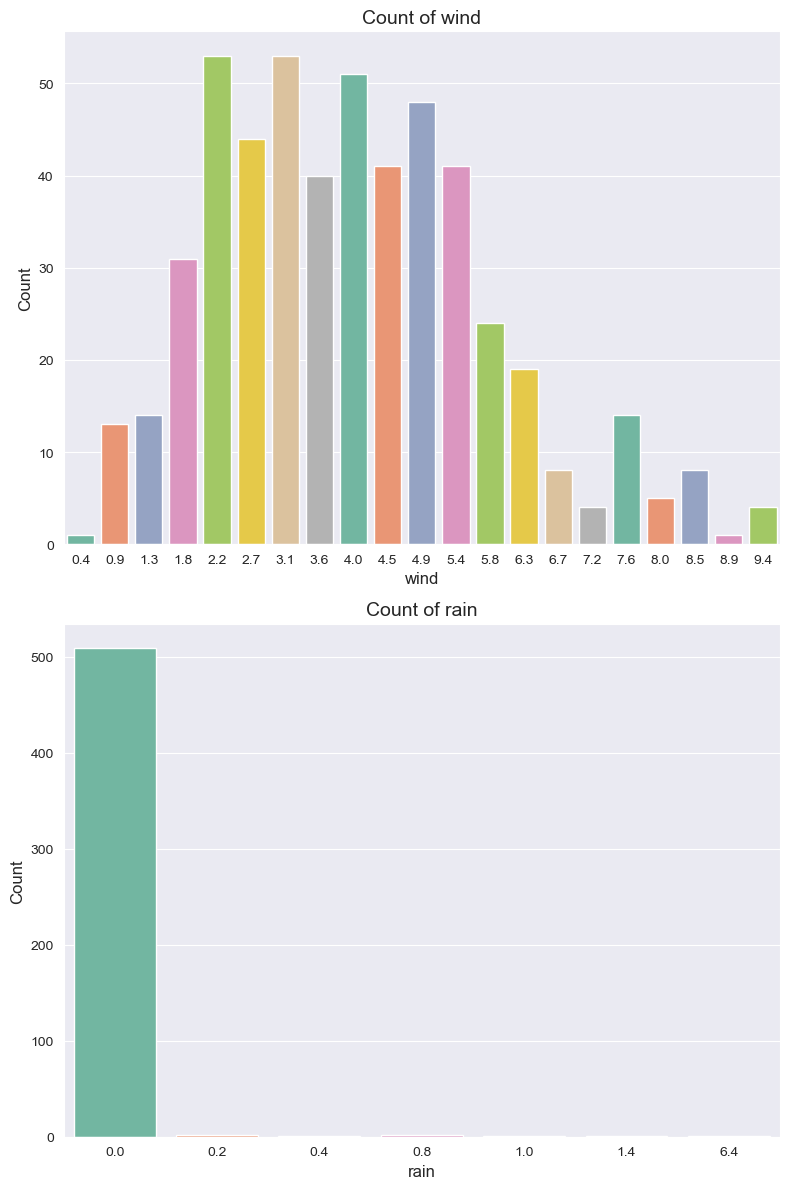

In [19]:
# Create subplots
fig,axes=plt.subplots(nrows=len(discrete_variables),figsize=(8,6 * len(discrete_variables)))

# Loop through each discrete column and create a count plot
for col,ax in zip(discrete_variables,axes):
    sns.countplot(data=Forest_fires,x=col,ax=ax,palette='Set2')
    ax.set_title(f'Count of {col}',fontsize=14)
    ax.set_xlabel(col,fontsize=12)
    ax.set_ylabel('Count',fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

**Categorical Columns**

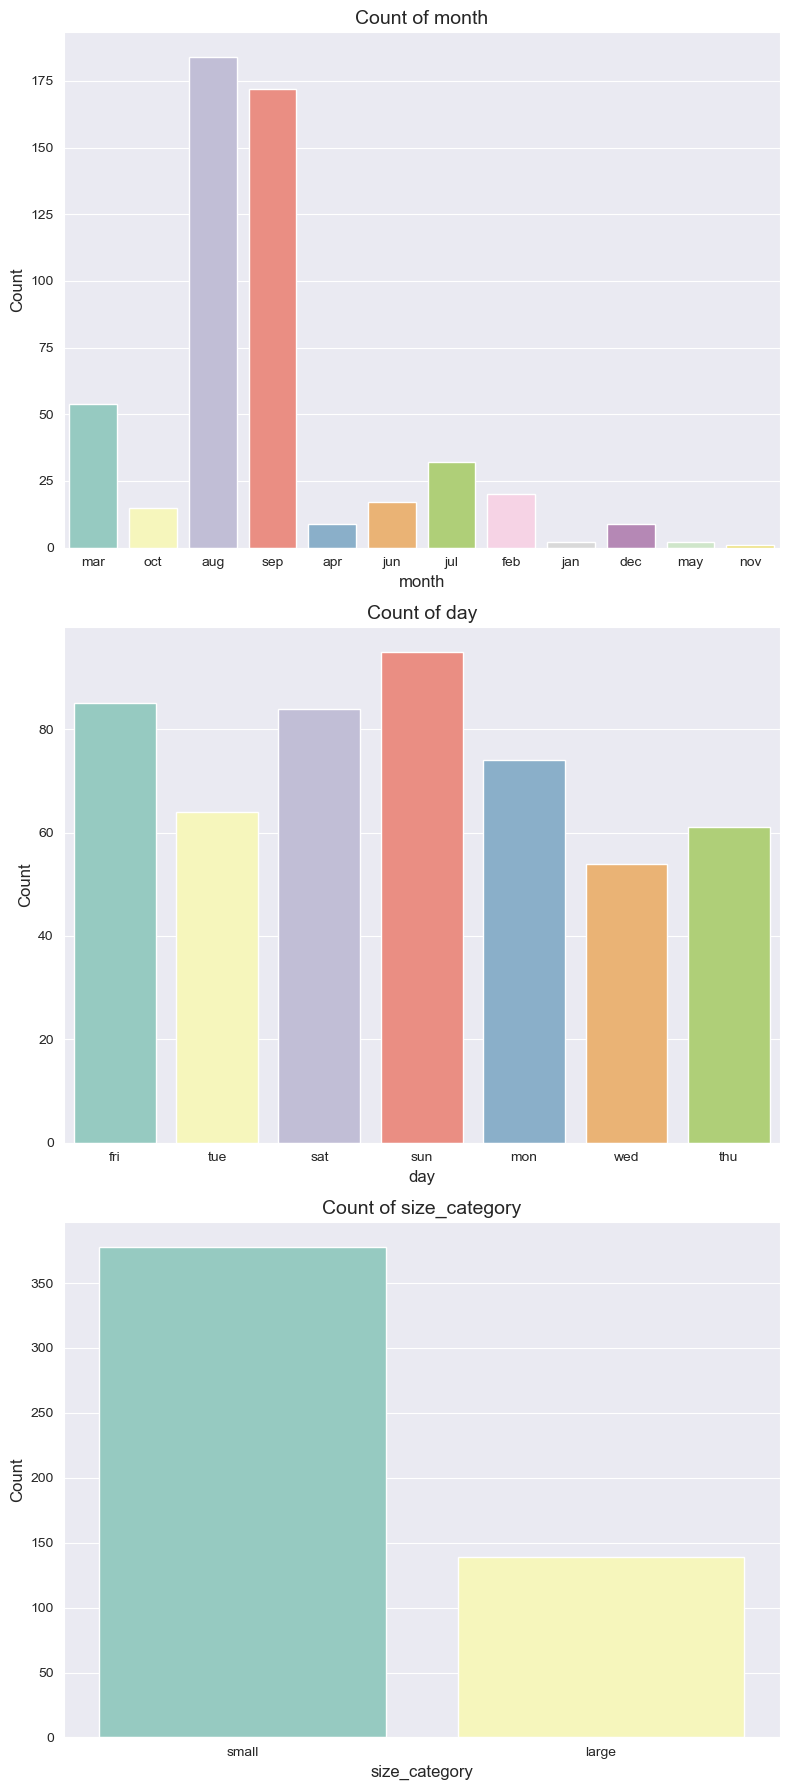

In [20]:
# Create subplots
fig,axes=plt.subplots(nrows=len(categorical_variables),figsize=(8,6 * len(categorical_variables)))

# Loop through each categorical column and create a count plot
for col,ax in zip(categorical_variables,axes):
    sns.countplot(data=Forest_fires, x=col, ax=ax, palette='Set3')
    ax.set_title(f'Count of {col}', fontsize=14)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

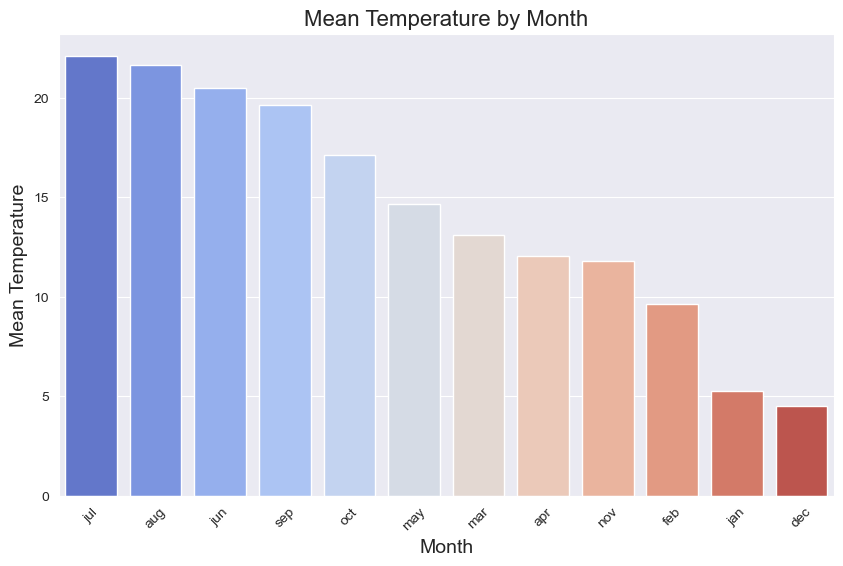

In [21]:
# Aggregate temperature data by month and calculate the mean temperature for each month
monthly_temp=Forest_fires.groupby('month')['temp'].mean().reset_index()

# Sort the data by mean temperature in descending order
monthly_temp_sorted=monthly_temp.sort_values(by='temp',ascending=False)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_temp_sorted,x='month',y='temp',palette='coolwarm')
plt.title('Mean Temperature by Month',fontsize=16)
plt.xlabel('Month',fontsize=14)
plt.ylabel('Mean Temperature',fontsize=14)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.show()

On an average, the month of July has an higher temperature.

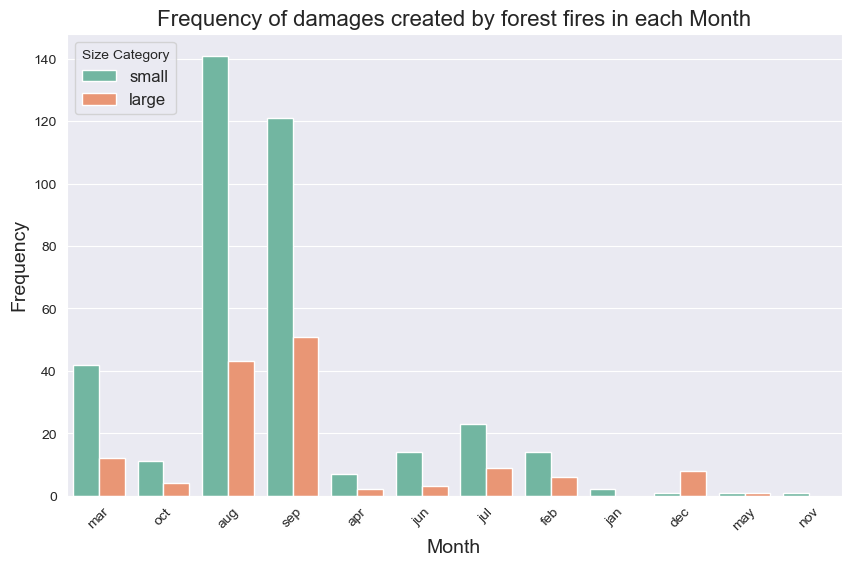

In [22]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=Forest_fires, x='month', hue='size_category', palette='Set2')
plt.title('Frequency of damages created by forest fires in each Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Size Category', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

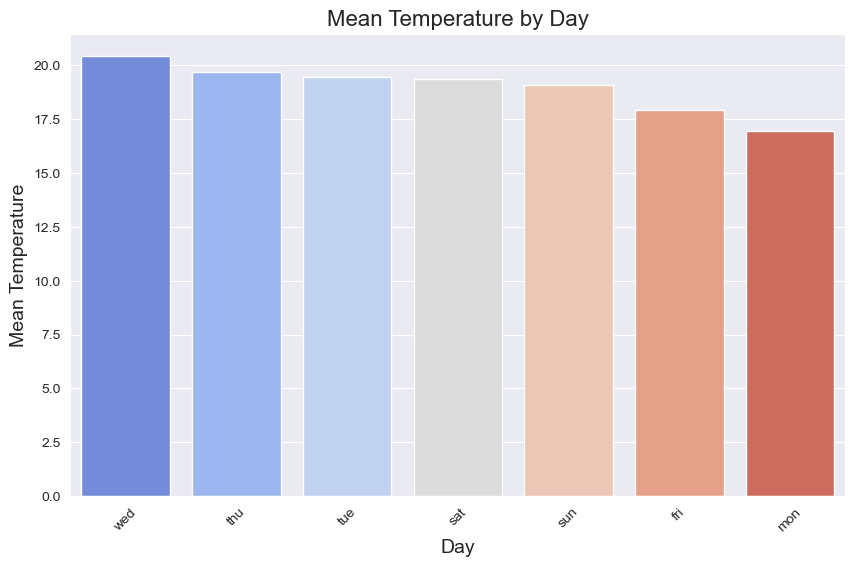

In [23]:
# Aggregate temperature data by day and calculate the mean temperature for each day
daily_temp=Forest_fires.groupby('day')['temp'].mean().reset_index()

# Sort the data by mean temperature in descending order
daily_temp_sorted=daily_temp.sort_values(by='temp', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=daily_temp_sorted, x='day', y='temp', palette='coolwarm')
plt.title('Mean Temperature by Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Mean Temperature', fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

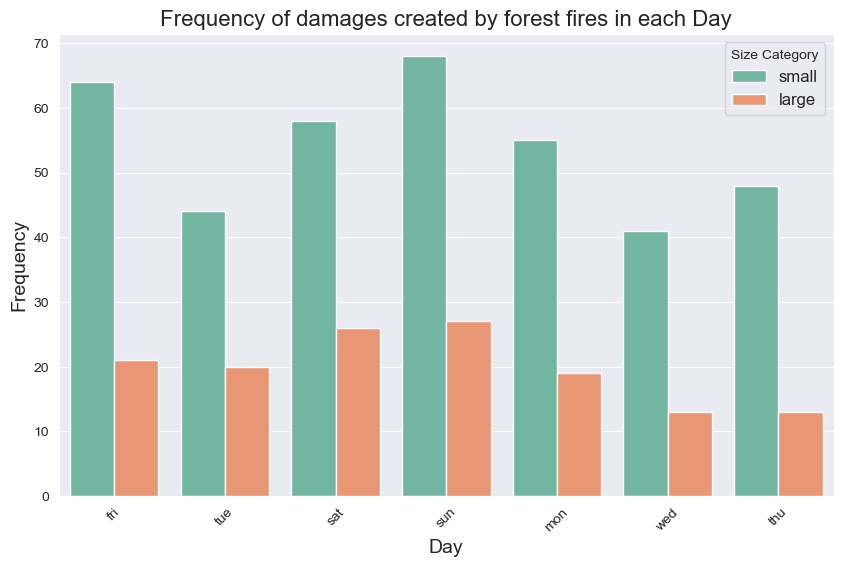

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=Forest_fires,x='day',hue='size_category', palette='Set2')
plt.title('Frequency of damages created by forest fires in each Day', fontsize=16)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Size Category', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

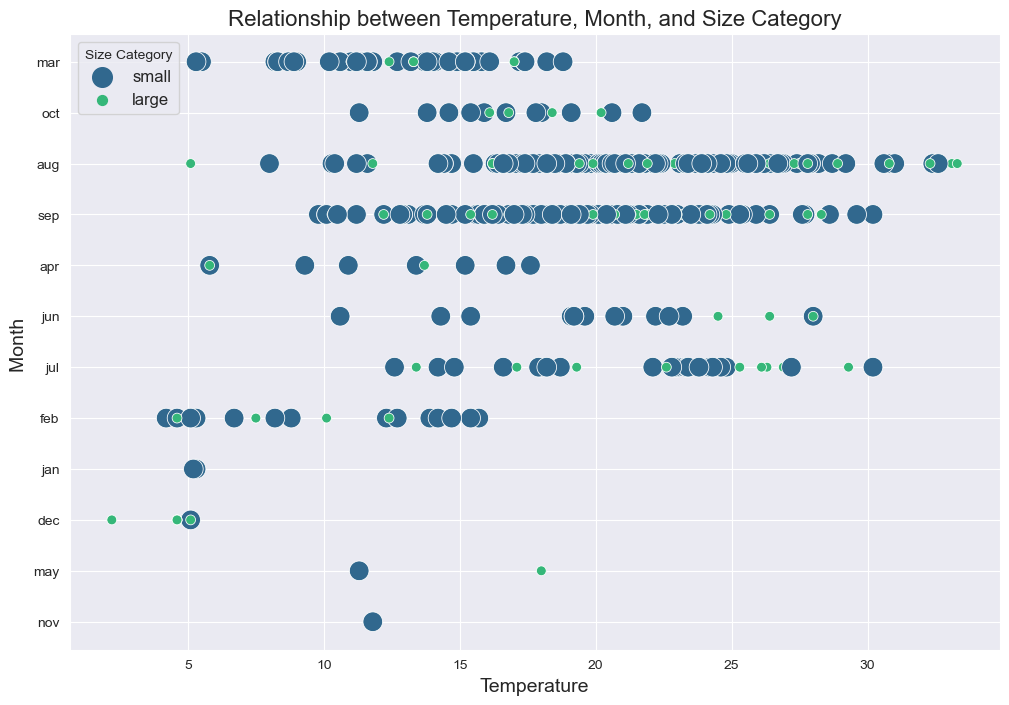

In [25]:
# Plotting
plt.figure(figsize=(12,8))
sns.scatterplot(data=Forest_fires,x='temp',y='month',hue='size_category',palette='viridis',size='size_category',sizes=(50, 200))
plt.title('Relationship between Temperature, Month, and Size Category', fontsize=16)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Month ', fontsize=14)
plt.legend(title='Size Category', fontsize=12, loc='upper left')
plt.show()

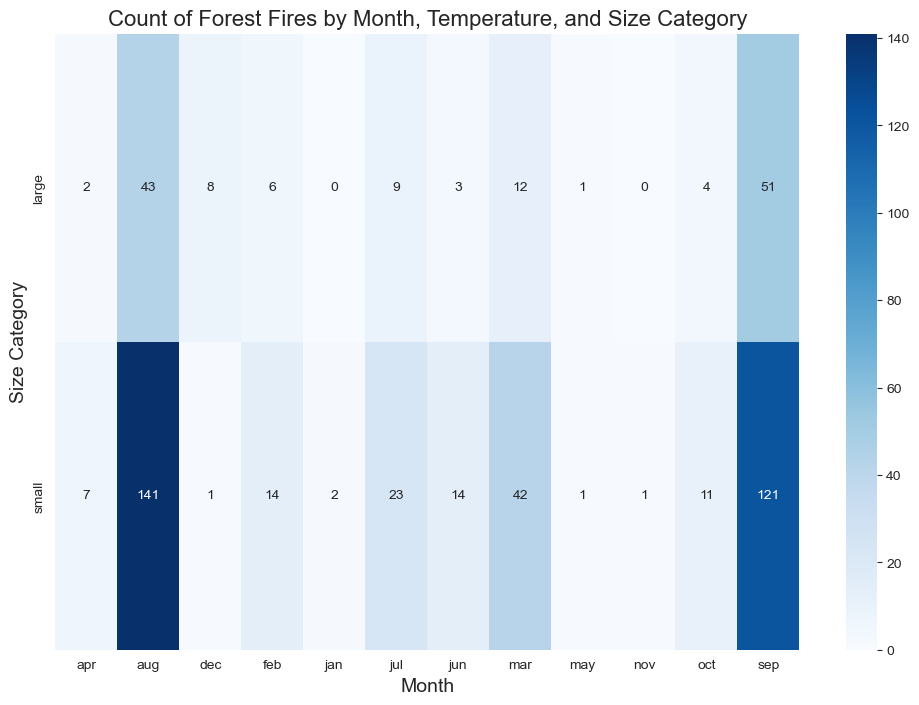

In [26]:
# Create a pivot table to count occurrences of each combination
pivot_table=Forest_fires.pivot_table(index='size_category',columns='month',values='temp',aggfunc='count',fill_value=0)

# Plotting
plt.figure(figsize=(12,8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='d')
plt.title('Count of Forest Fires by Month, Temperature, and Size Category', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Size Category', fontsize=14)
plt.show()

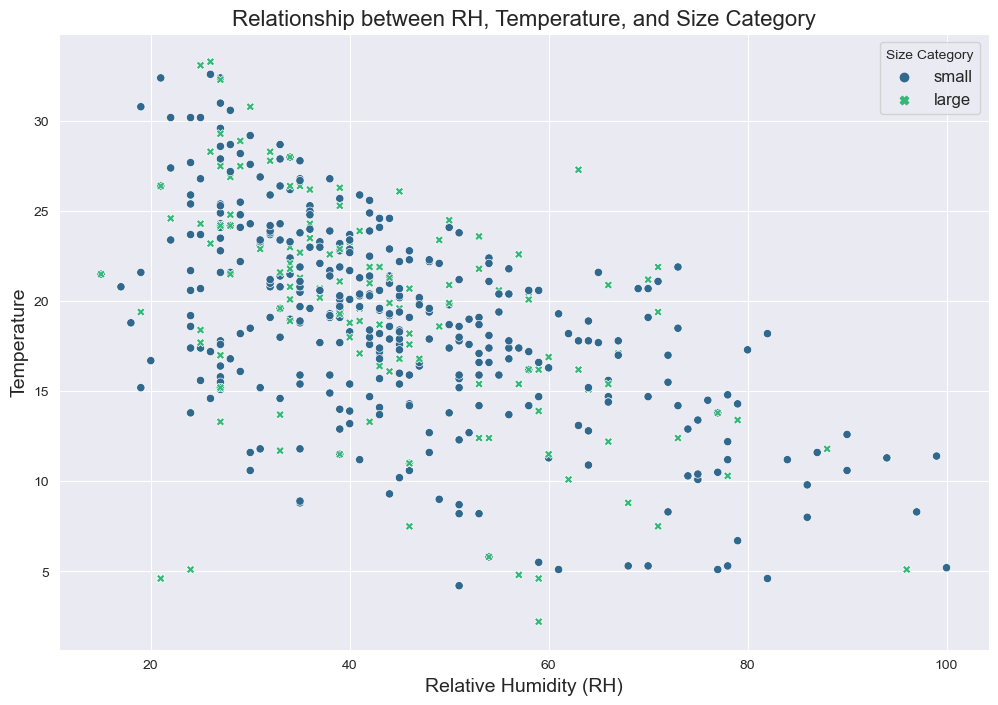

In [27]:
# Plotting
plt.figure(figsize=(12, 8))
sns.scatterplot(data=Forest_fires,x='RH',y='temp',hue='size_category', palette='viridis', style='size_category')
plt.title('Relationship between RH, Temperature, and Size Category', fontsize=16)
plt.xlabel('Relative Humidity (RH)', fontsize=14)
plt.ylabel('Temperature', fontsize=14)
plt.legend(title='Size Category', fontsize=12)
plt.show()

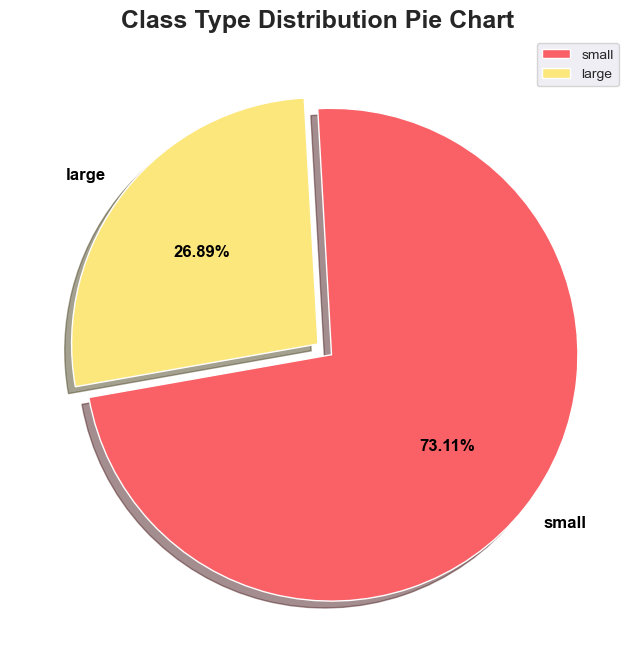

In [28]:
plt.figure(figsize=(12,8))
plt.pie(Forest_fires['size_category'].value_counts(),
       labels=Forest_fires.size_category.unique(),
       explode=[0.07,0.0],
       autopct='%.2f%%',
        colors=["#F96167", "#FCE77D"],
       shadow=True,
       startangle=190,
       textprops={'size':'large',
                   'fontweight':'bold',
                    'rotation':'0',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

From this pie chart we can observe that the data is imbalanced.

**Imbalanced Data**

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

+ Problems with Handling Imbalanced Data Classification
When the records of a certain class are much more than the other class, our classifier may get biased towards the prediction.

**Outliers**

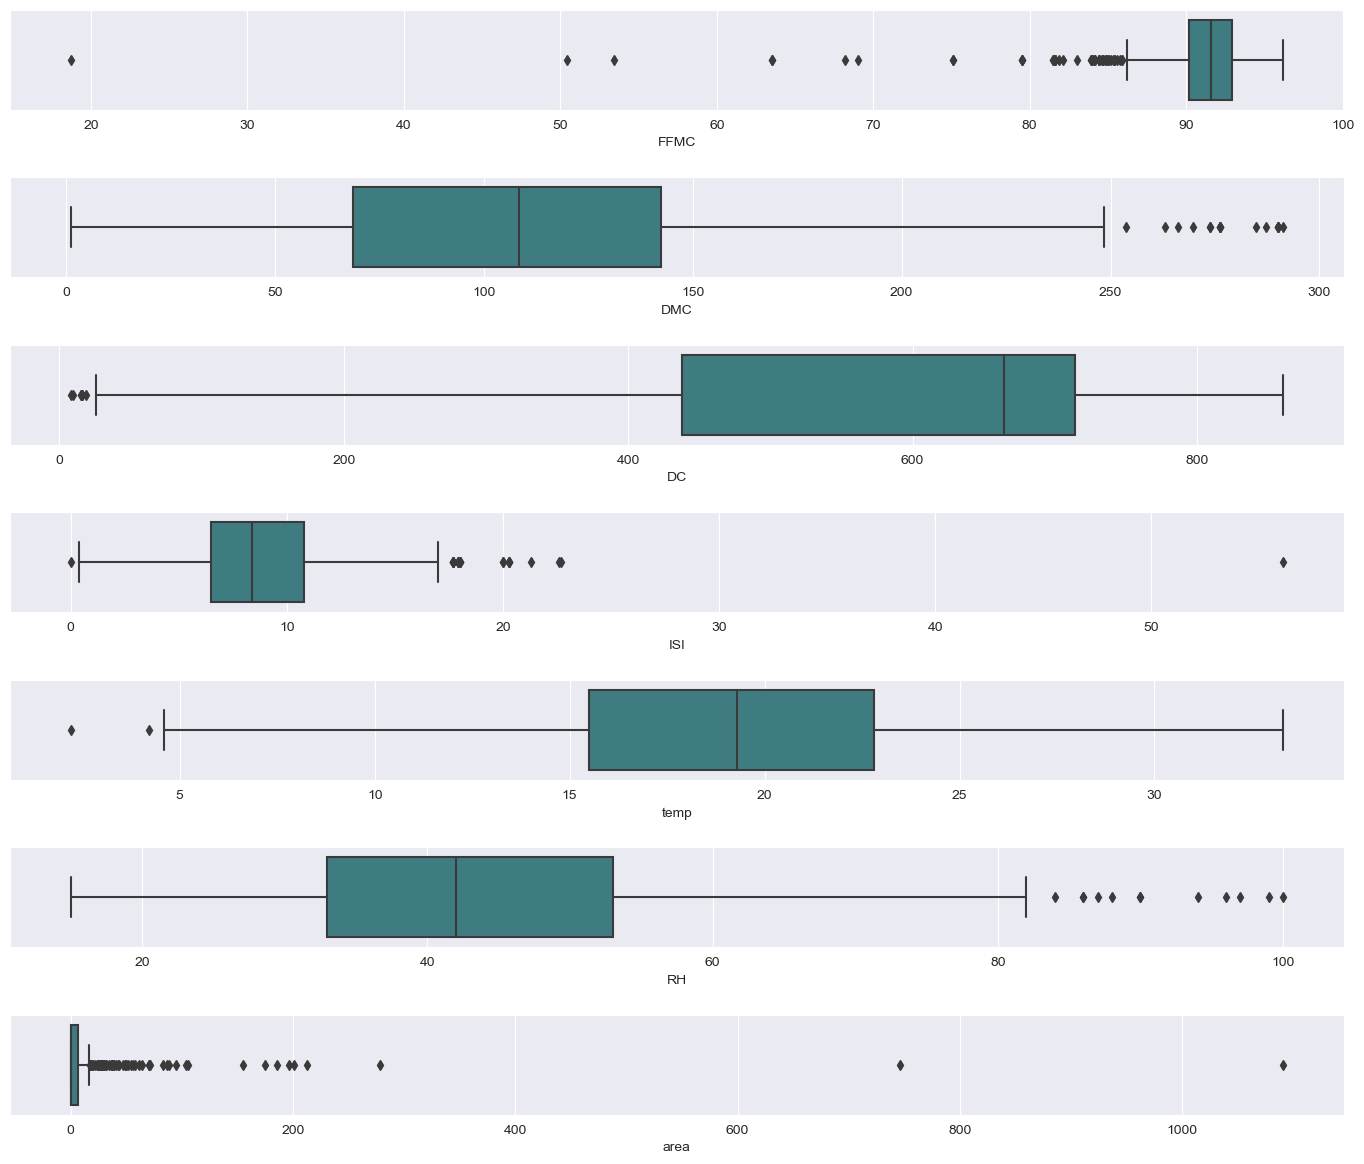

In [29]:
fig,axes=plt.subplots(7,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='FFMC',data=Forest_fires,palette='crest',ax=axes[0])
sns.boxplot(x='DMC',data=Forest_fires,palette='crest',ax=axes[1])
sns.boxplot(x='DC',data=Forest_fires,palette='crest',ax=axes[2])
sns.boxplot(x='ISI',data=Forest_fires,palette='crest',ax=axes[3])
sns.boxplot(x='temp',data=Forest_fires,palette='crest',ax=axes[4])
sns.boxplot(x='RH',data=Forest_fires,palette='crest',ax=axes[5])
sns.boxplot(x='area',data=Forest_fires,palette='crest',ax=axes[6])
plt.tight_layout(pad=2.0)

Outliers are present in our dataset but we can't drop them because they are present in a very large quantity and can be important for model building.

### Data Pre-processing

**Encoding**

In [30]:
# One-hot encode 'month' column
Forest_fires=pd.get_dummies(Forest_fires,columns=['month'])

In [31]:
# One-hot encode 'day' column
Forest_fires=pd.get_dummies(Forest_fires,columns=['day'])

In [32]:
size_category_mapping={'small': 0,'large': 1}
Forest_fires['size_category']=Forest_fires['size_category'].map(size_category_mapping)

In [33]:
Forest_fires.columns

Index(['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area',
       'size_category', 'month_apr', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_fri', 'day_mon', 'day_sat',
       'day_sun', 'day_thu', 'day_tue', 'day_wed'],
      dtype='object')

In [34]:
Clean_data=Forest_fires.copy()

**Standardization**

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
# Select the continuous variables
continuous_cols=['wind', 'rain', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'area']

In [37]:
# Initialize StandardScaler
scaler=StandardScaler()

# Fit and transform the continuous columns
Forest_fires[continuous_cols]=scaler.fit_transform(Forest_fires[continuous_cols])

# Display the standardized DataFrame
print(Forest_fires)

         FFMC       DMC        DC       ISI      temp        RH      wind  \
0   -0.805959 -1.323326 -1.830477 -0.860946 -1.842640  0.411724  1.498614   
1   -0.008102 -1.179541  0.488891 -0.509688 -0.153278 -0.692456 -1.741756   
2   -0.008102 -1.049822  0.560715 -0.509688 -0.739383 -0.692456 -1.518282   
3    0.191362 -1.212361 -1.898266 -0.004756 -1.825402  3.233519 -0.009834   
4   -0.243833 -0.931043 -1.798600  0.126966 -1.291012  3.356206 -1.238940   
..        ...       ...       ...       ...       ...       ...       ...   
512 -1.640083 -0.846648  0.474768 -1.563460  1.536084 -0.753800 -0.736124   
513 -1.640083 -0.846648  0.474768 -1.563460  0.519019  1.638592  0.995798   
514 -1.640083 -0.846648  0.474768 -1.563460  0.398350  1.577248  1.498614   
515  0.680957  0.549003  0.269382  0.500176  1.156839 -0.140366 -0.009834   
516 -2.020879 -1.685913 -1.780442 -1.739089 -1.222058 -0.815143  0.269509   

         rain      area  size_category  ...  month_nov  month_oct  month_se

**Feature Selection**

In [38]:
from sklearn.feature_selection import SelectKBest,chi2

In [39]:
# Define features and target
X=Clean_data.drop(columns=['size_category'])  # Features
y=Clean_data['size_category']  # Target

In [40]:
# Feature selection
selector=SelectKBest(score_func=chi2,k=4)
selector.fit(X, y)

SelectKBest(k=4, score_func=<function chi2 at 0x000002D4C37B13A0>)

In [41]:
# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

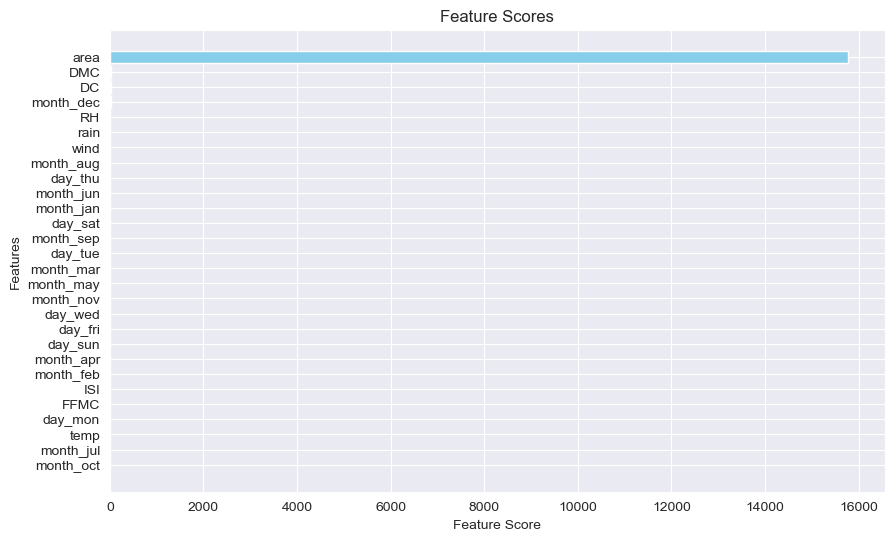

In [42]:
# Plotting feature scores
plt.figure(figsize=(10, 6))
plt.barh(feature_scores['Feature'], feature_scores['Score'], color='skyblue')
plt.xlabel('Feature Score')
plt.ylabel('Features')
plt.title('Feature Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display highest score at the top
plt.show()

In [43]:
# Print feature scores
print("Feature Scores:")
print(feature_scores)

Feature Scores:
      Feature         Score
8        area  15773.685520
1         DMC     23.006108
2          DC     21.872657
11  month_dec     17.601210
5          RH      6.350054
7        rain      5.216072
6        wind      1.440661
10  month_aug      1.157358
25    day_thu      0.964276
15  month_jun      0.738170
13  month_jan      0.735450
23    day_sat      0.706636
20  month_sep      0.669086
26    day_tue      0.620080
16  month_mar      0.597478
17  month_may      0.543575
18  month_nov      0.367725
27    day_wed      0.217190
21    day_fri      0.205497
24    day_sun      0.113897
9   month_apr      0.099580
12  month_feb      0.098668
3         ISI      0.090542
0        FFMC      0.084434
22    day_mon      0.055135
4        temp      0.033386
14  month_jul      0.024995
19  month_oct      0.000367


In [44]:
model_data=Forest_fires[['DMC','DC','RH','rain','wind','area','month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov','month_oct', 'month_sep','size_category']]
model_data

,DMC,DC,RH,rain,wind,area,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,size_category
0,-1.323326,-1.830477,0.411724,-0.073268,1.498614,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
1,-1.179541,0.488891,-0.692456,-0.073268,-1.741756,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-1.049822,0.560715,-0.692456,-0.073268,-1.518282,-0.202020,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-1.212361,-1.898266,3.233519,0.603155,-0.009834,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.931043,-1.798600,3.356206,-0.073268,-1.238940,-0.202020,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.846648,0.474768,-0.753800,-0.073268,-0.736124,-0.100753,0,1,0,0,0,0,0,0,0,0,0,0,1
513,-0.846648,0.474768,1.638592,-0.073268,0.995798,0.651674,0,1,0,0,0,0,0,0,0,0,0,0,1
514,-0.846648,0.474768,1.577248,-0.073268,1.498614,-0.026532,0,1,0,0,0,0,0,0,0,0,0,0,1
515,0.549003,0.269382,-0.140366,-0.073268,-0.009834,-0.202020,0,1,0,0,0,0,0,0,0,0,0,0,0


### Test Train Split With Imbalanced Dataset

In [45]:
x = model_data.drop('size_category',axis=1)
y = model_data[['size_category']]

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=3, stratify=y)
len(x_train.columns)

18

### Hyperparameter Tuning

In [48]:
from tensorflow import keras
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras import layers
from keras.models import Sequential
from keras_tuner.tuners import RandomSearch

Using TensorFlow backend


**Optimal Learning rate ,Number of Layers and Neurons**

In [49]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=100, step=32), activation='relu'))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), 
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [50]:
tuner = RandomSearch(build_model, objective= 'val_accuracy', max_trials= 5, 
                     executions_per_trial=3, directory= 'project', project_name= 'Forest Fire')
tuner.search_space_summary()

Reloading Tuner from project\Forest Fire\tuner0.json
Search space summary
Default search space size: 15
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 100, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_v

In [51]:
tuner.search(x_train, y_train, epochs= 100, validation_data= (x_test, y_test))

In [52]:
tuner.results_summary()

Results summary
Results in project\Forest Fire
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 1 summary
Hyperparameters:
num_layers: 6
units_0: 96
units_1: 96
learning_rate: 0.001
units_2: 32
units_3: 32
units_4: 32
units_5: 32
Score: 0.9615384538968405

Trial 3 summary
Hyperparameters:
num_layers: 13
units_0: 64
units_1: 32
learning_rate: 0.001
units_2: 64
units_3: 64
units_4: 96
units_5: 64
units_6: 32
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
Score: 0.9316239158312479

Trial 2 summary
Hyperparameters:
num_layers: 3
units_0: 64
units_1: 32
learning_rate: 0.0001
units_2: 96
units_3: 64
units_4: 32
units_5: 96
Score: 0.8675213654836019

Trial 4 summary
Hyperparameters:
num_layers: 3
units_0: 32
units_1: 32
learning_rate: 0.0001
units_2: 64
units_3: 64
units_4: 96
units_5: 64
units_6: 96
units_7: 32
units_8: 64
units_9: 64
units_10: 32
units_11: 96
units_12: 96
Score: 0.8183760643005371

Trial 0 summary
Hyperparameters:
num

**Optimal Batch_size, Number of Epochs**

In [53]:
def create_model():
    model1 = Sequential()
    model1.add(Dense(64,input_dim=18,activation='relu'))
    model1.add(Dense(64,activation='relu'))
    model1.add(Dense(32,activation="relu"))
    model1.add(Dense(units=1,activation="sigmoid"))
    
    adam = Adam(learning_rate=0.01)
    model1.compile(loss='binary_crossentropy',optimizer = adam,metrics=["accuracy"])
    return model1

In [54]:
from sklearn.model_selection import GridSearchCV, KFold

In [55]:
from sklearn.metrics import make_scorer, accuracy_score

In [56]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [57]:
model1 = KerasClassifier(build_fn= create_model, verbose=0)
batch_size = [10,20,40,50]
epochs = [10,50,100,200]
param_grid = dict(batch_size= batch_size, epochs=epochs)
grid = GridSearchCV(estimator= model1, param_grid= param_grid, cv= KFold(), verbose= 10)

In [58]:
grid_result = grid.fit(x_test,y_test)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START batch_size=10, epochs=10...................................
[CV 1/5; 1/16] END ....batch_size=10, epochs=10;, score=0.875 total time=   2.9s
[CV 2/5; 1/16] START batch_size=10, epochs=10...................................
[CV 2/5; 1/16] END ....batch_size=10, epochs=10;, score=1.000 total time=   2.4s
[CV 3/5; 1/16] START batch_size=10, epochs=10...................................
[CV 3/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   2.5s
[CV 4/5; 1/16] START batch_size=10, epochs=10...................................
[CV 4/5; 1/16] END ....batch_size=10, epochs=10;, score=0.968 total time=   2.4s
[CV 5/5; 1/16] START batch_size=10, epochs=10...................................
[CV 5/5; 1/16] END ....batch_size=10, epochs=10;, score=0.935 total time=   2.4s
[CV 1/5; 2/16] START batch_size=10, epochs=50...................................
[CV 1/5; 2/16] END ....batch_size=10, epochs=50;

[CV 3/5; 9/16] END ....batch_size=40, epochs=10;, score=0.903 total time=   2.1s
[CV 4/5; 9/16] START batch_size=40, epochs=10...................................
[CV 4/5; 9/16] END ....batch_size=40, epochs=10;, score=0.839 total time=   2.1s
[CV 5/5; 9/16] START batch_size=40, epochs=10...................................
[CV 5/5; 9/16] END ....batch_size=40, epochs=10;, score=0.935 total time=   2.1s
[CV 1/5; 10/16] START batch_size=40, epochs=50..................................
[CV 1/5; 10/16] END ...batch_size=40, epochs=50;, score=0.875 total time=   2.9s
[CV 2/5; 10/16] START batch_size=40, epochs=50..................................
[CV 2/5; 10/16] END ...batch_size=40, epochs=50;, score=0.968 total time=   2.8s
[CV 3/5; 10/16] START batch_size=40, epochs=50..................................
[CV 3/5; 10/16] END ...batch_size=40, epochs=50;, score=0.935 total time=   2.8s
[CV 4/5; 10/16] START batch_size=40, epochs=50..................................
[CV 4/5; 10/16] END ...batch

In [59]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{}, {} with {}".format(mean,stdev,param))

Best 0.9620967741935484, using {'batch_size': 10, 'epochs': 50}
0.9491935483870968, 0.04233678951098933 with {'batch_size': 10, 'epochs': 10}
0.9620967741935484, 0.04587568597847707 with {'batch_size': 10, 'epochs': 50}
0.9362903225806452, 0.03387096774193549 with {'batch_size': 10, 'epochs': 100}
0.9491935483870968, 0.04233678951098933 with {'batch_size': 10, 'epochs': 200}
0.8784274193548388, 0.02255542946926934 with {'batch_size': 20, 'epochs': 10}
0.9491935483870968, 0.0370967741935484 with {'batch_size': 20, 'epochs': 50}
0.9362903225806452, 0.04449391685204428 with {'batch_size': 20, 'epochs': 100}
0.9556451612903226, 0.046885296302414954 with {'batch_size': 20, 'epochs': 200}
0.897983870967742, 0.06732301343045273 with {'batch_size': 40, 'epochs': 10}
0.942741935483871, 0.03610166013806355 with {'batch_size': 40, 'epochs': 50}
0.9493951612903226, 0.05798746007107293 with {'batch_size': 40, 'epochs': 100}
0.9493951612903226, 0.05427994505306338 with {'batch_size': 40, 'epochs': 2

**Optimal Droupout rate**

In [63]:
from tensorflow.keras.layers import Dropout 

In [64]:
def create_model():  
    model2 = Sequential()
    model2.add(Dense(64, input_dim=18, activation='relu'))
    model2.add(Dense(64, activation='relu'))
    model2.add(Dense(32, activation="relu"))
    model2.add(Dense(units=1, activation="sigmoid"))

    adam = Adam(lr=0.01)
    model2.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])
    return model2

model2 = KerasClassifier(build_fn=create_model, batch_size=10, epochs=100, verbose=0, dropout_rate=0.0)

param_grid = {
    'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

grid2 = GridSearchCV(estimator=model2, param_grid=param_grid, cv=KFold(), verbose=10)
grid_result2 = grid2.fit(x_test, y_test)  


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START dropout_rate=0.0............................................
[CV 1/5; 1/6] END ...............dropout_rate=0.0;, score=nan total time=   0.0s
[CV 2/5; 1/6] START dropout_rate=0.0............................................
[CV 2/5; 1/6] END ...............dropout_rate=0.0;, score=nan total time=   0.0s
[CV 3/5; 1/6] START dropout_rate=0.0............................................
[CV 3/5; 1/6] END ...............dropout_rate=0.0;, score=nan total time=   0.0s
[CV 4/5; 1/6] START dropout_rate=0.0............................................
[CV 4/5; 1/6] END ...............dropout_rate=0.0;, score=nan total time=   0.0s
[CV 5/5; 1/6] START dropout_rate=0.0............................................
[CV 5/5; 1/6] END ...............dropout_rate=0.0;, score=nan total time=   0.0s
[CV 1/5; 2/6] START dropout_rate=0.1............................................
[CV 1/5; 2/6] END ...............dropout_rate=0.1

TypeError: create_model() got an unexpected keyword argument 'dropout_rate'

**Optimal Activation Function and Kernel Initializer**

In [66]:
def create_model(activation_function,init):
    model3 = Sequential()
    model3.add(Dense(64,input_dim=18,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(64,activation='relu'))
    model3.add(Dropout(0.0))
    model3.add(Dense(32,activation="relu"))
    model3.add(Dropout(0.0))
    model3.add(Dense(units=1,activation="sigmoid"))
    
    adam = Adam(lr=0.01)
    model3.compile(loss='binary_crossentropy', optimizer = adam, metrics=["accuracy"])
    return model3

In [67]:
model3 = KerasClassifier(build_fn=create_model,batch_size=10,epochs=100,verbose=0)
activation_function = ['softmax','tanh','relu']
init = ['normal','uniform','zero']
param_grid = dict(activation_function= activation_function, init= init)
grid3 = GridSearchCV(estimator= model3, param_grid= param_grid, cv= KFold(), verbose=10)

###  Building Neural Networks Model

**Initialising the ANN**

In [69]:
def toFindBestParams(x_train, y_train, x_test, y_test):

    # Defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20 ]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # Initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # Create ANN model
            model = Sequential()
            
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
            # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]   
            # Printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train, y_train, x_test, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8393352031707764
batch_size: 5 - epochs: 10 Accuracy: 0.950138509273529
batch_size: 5 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 5 - epochs: 100 Accuracy: 0.9833794832229614
batch_size: 10 - epochs: 5 Accuracy: 0.7728531956672668
batch_size: 10 - epochs: 10 Accuracy: 0.8642659187316895
batch_size: 10 - epochs: 50 Accuracy: 0.9889196753501892
batch_size: 10 - epochs: 100 Accuracy: 0.9972299337387085
batch_size: 15 - epochs: 5 Accuracy: 0.761772871017456
batch_size: 15 - epochs: 10 Accuracy: 0.8337950110435486
batch_size: 15 - epochs: 50 Accuracy: 0.9944598078727722
batch_size: 15 - epochs: 100 Accuracy: 0.9916897416114807
batch_size: 20 - epochs: 5 Accuracy: 0.7534626126289368
batch_size: 20 - epochs: 10 Accuracy: 0.7867035865783691
batch_size: 20 - epochs: 50 Accuracy: 0.9861496090888977
batch_size: 20 - epochs: 100 Accuracy: 0.9972299337387085


**Training Model**

In [70]:
# create ANN model
model = Sequential()

# Defining the first layer of the model
model.add(Dense(units=50, input_dim=x_train.shape[1], kernel_initializer='normal', activation='tanh'))

# Defining the Second layer of the model
model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
    
# The output neuron is a single fully connected node Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))

model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with best parameters
history = model.fit(x_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
25/25 [==============================] - 2s 29ms/step - loss: 0.6868 - accuracy: 0.7469 - val_loss: 0.6832 - val_accuracy: 0.6833
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6682 - accuracy: 0.7635 - val_loss: 0.6633 - val_accuracy: 0.7083
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6259 - accuracy: 0.7635 - val_loss: 0.6235 - val_accuracy: 0.7167
Epoch 4/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5760 - accuracy: 0.7718 - val_loss: 0.5935 - val_accuracy: 0.7167
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5385 - accuracy: 0.7759 - val_loss: 0.5767 - val_accuracy: 0.7333
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.5147 - accuracy: 0.7759 - val_loss: 0.5639 - val_accuracy: 0.7333
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 0.4952 - accuracy: 0.7842 - val_loss: 0.5515 - val_accuracy: 0.7417
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0328 - accuracy: 0.9959 - val_loss: 0.3025 - val_accuracy: 0.9333
Epoch 60/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0302 - accuracy: 0.9959 - val_loss: 0.3090 - val_accuracy: 0.9167
Epoch 61/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0306 - accuracy: 0.9917 - val_loss: 0.3056 - val_accuracy: 0.9250
Epoch 62/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.3122 - val_accuracy: 0.9083
Epoch 63/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0447 - accuracy: 0.9876 - val_loss: 0.3263 - val_accuracy: 0.9250
Epoch 64/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0343 - accuracy: 0.9876 - val_loss: 0.3129 - val_accuracy: 0.9250
Epoch 65/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0261 - accuracy: 0.9959 - val_loss: 0.3228 - val_accuracy: 0.9083
Epoch 

**Model Evaluation Train and Test Error**

In [71]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0980 - accuracy: 0.9787
accuracy: 97.87%


In [72]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Compare the train-set and test-set accuracy

**Check for overfitting and underfitting**

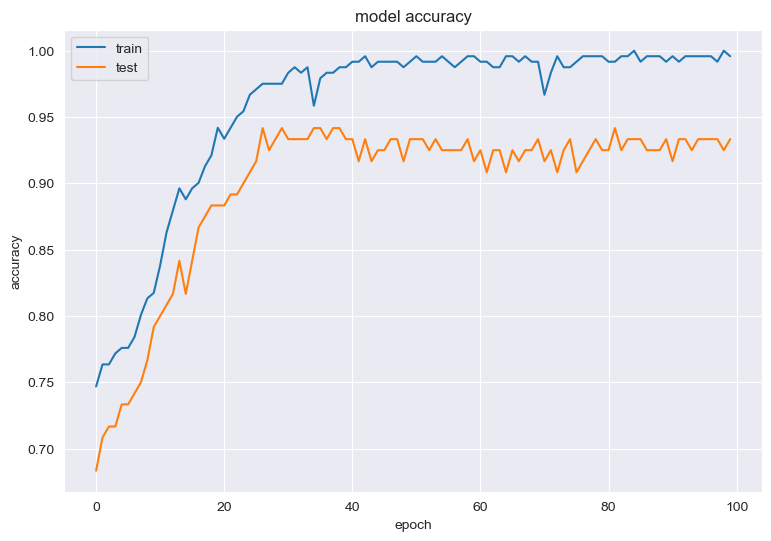

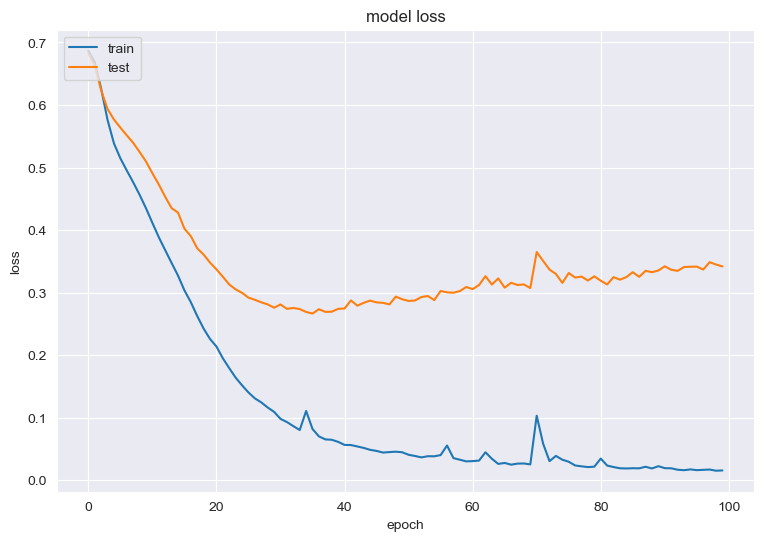

In [73]:
# summarize history for accuracy
plt.figure(figsize=(9,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.figure(figsize=(9,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predicting values from Model

In [74]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
test_prediction = pd.DataFrame()
test_prediction['Test_Actual'] = y_test.size_category
test_prediction['Test_Probability'] = y_predict_test
def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

# converting the probability of target variable to binary class of test data
test_prediction['Test_Predicted'] = test_prediction['Test_Probability'].apply(probToBinary)
print(test_prediction.shape)
test_prediction.head(10)

5/5 [==============================] - 0s 3ms/step
(156, 3)


,Test_Actual,Test_Probability,Test_Predicted
493,1,0.996953,1
298,0,0.001877,0
93,0,0.002159,0
437,0,0.002550,0
340,0,0.016137,0
7,0,0.002205,0
172,0,0.005092,0
76,0,0.002363,0
148,0,0.002543,0
104,0,0.001903,0


In [75]:
# generating predictions for train data
y_predict_train = model.predict(x_train)

# creating table with test price & predicted price for test
train_prediction = pd.DataFrame()
train_prediction['Train_Actual'] = y_train.size_category
train_prediction['Train_Probability'] = y_predict_train
train_prediction['Train_Predicted'] = train_prediction['Train_Probability'].apply(probToBinary)
print(train_prediction.shape)
train_prediction.head(10)

12/12 [==============================] - 0s 2ms/step
(361, 3)


,Train_Actual,Train_Probability,Train_Predicted
115,0,0.002813,0
130,0,0.002434,0
413,0,0.002381,0
350,0,0.011426,0
103,0,0.002099,0
511,0,0.002134,0
325,0,0.002134,0
473,1,0.996953,1
265,0,0.002285,0
226,1,0.996953,1


**Classification Report**

In [76]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [78]:
print("Accuracy score for Test Data    = ", np.round(accuracy_score(test_prediction['Test_Actual'],test_prediction['Test_Predicted']),2)*100,"%")
print("Confusion Matrix for Test Data  =\n", confusion_matrix(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))
print("Classification Report for Test Data  =\n", classification_report(test_prediction['Test_Actual'],test_prediction['Test_Predicted']))

Accuracy score for Test Data    =  98.0 %
Confusion Matrix for Test Data  =
 [[112   2]
 [  1  41]]
Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       114
           1       0.95      0.98      0.96        42

    accuracy                           0.98       156
   macro avg       0.97      0.98      0.98       156
weighted avg       0.98      0.98      0.98       156



In [79]:
print("Accuracy score for Train Data    = ", np.round(accuracy_score(train_prediction['Train_Actual'],train_prediction['Train_Predicted']),2)*100,"%")
print("Confusion Matrix for Train Data  =\n", confusion_matrix(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))
print("Classification Report for Train Data  =\n", classification_report(train_prediction['Train_Actual'],train_prediction['Train_Predicted']))

Accuracy score for Train Data    =  98.0 %
Confusion Matrix for Train Data  =
 [[262   2]
 [  6  91]]
Classification Report for Train Data  =
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       264
           1       0.98      0.94      0.96        97

    accuracy                           0.98       361
   macro avg       0.98      0.97      0.97       361
weighted avg       0.98      0.98      0.98       361



In [80]:
# print the scores on training and test set
y_predict_test = model.predict(x_test) 
y_predict_train = model.predict(x_train)
print('Training set score : {:.2f}%'.format(accuracy_score(train_prediction['Train_Actual'], train_prediction['Train_Predicted'])*100))

print('Test set score     : {:.2f}%'.format(accuracy_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])*100))

12/12 [==============================] - 0s 3ms/step
Training set score : 97.78%
Test set score     : 98.08%


Neural Networks model using Linear Kernel has great predictive power to identify the fire size that would be either small or large in the Forest.

**Confusion matrix**

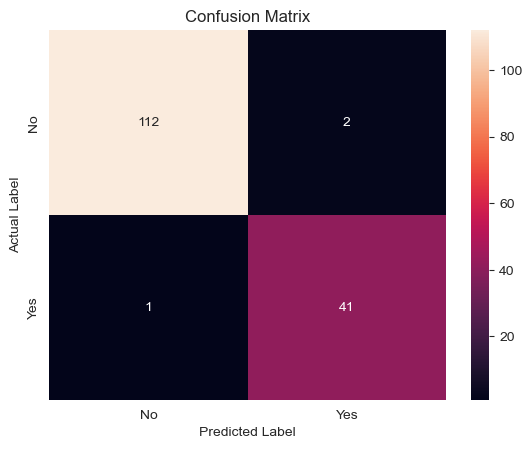

In [81]:
cm_df = confusion_matrix(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
class_label = ["No", "Yes"]
df_cm = pd.DataFrame(cm_df, index = class_label, columns = class_label)

sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.show()

**ROC - AUC Curve**

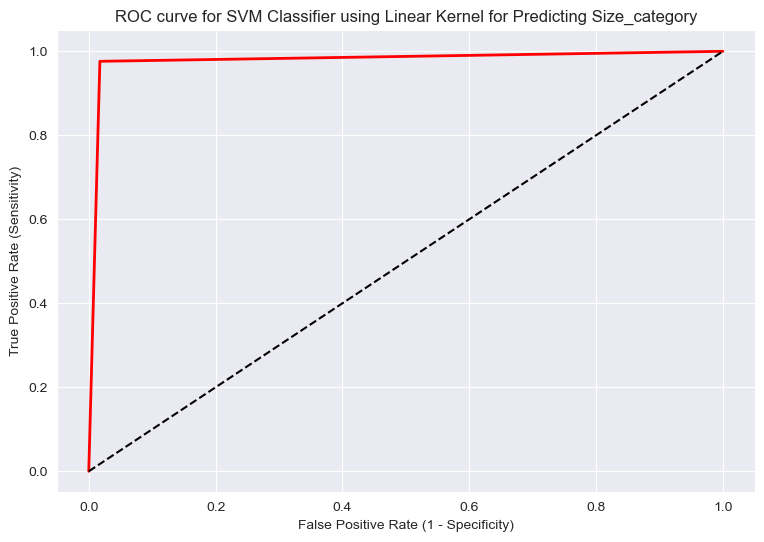

ROC AUC : 0.9793


In [82]:
plt.figure(figsize=(9,6))
fpr, tpr, thresholds = roc_curve(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
plt.plot(fpr, tpr, linewidth=2, color='red')
plt.plot([0,1], [0,1], 'k--' )
plt.title('ROC curve for SVM Classifier using Linear Kernel for Predicting Size_category')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

ROC_AUC = roc_auc_score(test_prediction['Test_Actual'], test_prediction['Test_Predicted'])
print('ROC AUC : {:.4f}'.format(ROC_AUC))

**Plot histogram of predicted probabilities**

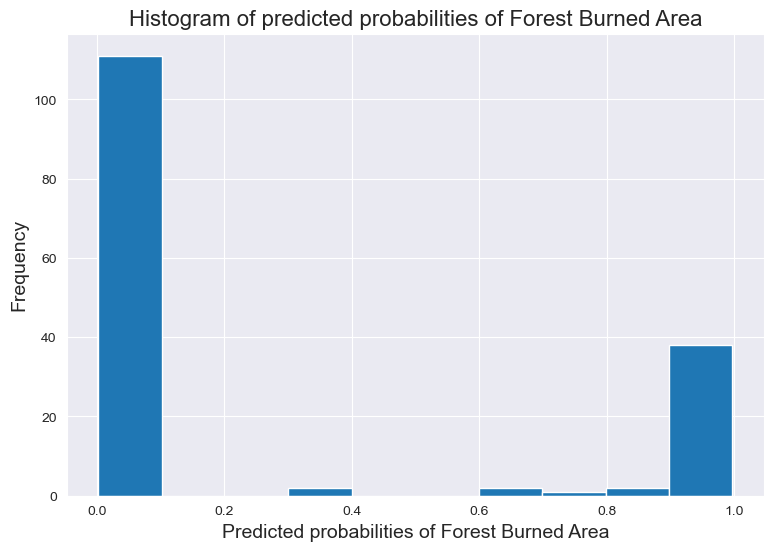

In [83]:
plt.figure(figsize=(9,6))
plt.hist(test_prediction['Test_Probability'], bins = 10)
plt.title('Histogram of predicted probabilities of Forest Burned Area', fontsize=16)
plt.xlabel('Predicted probabilities of Forest Burned Area', fontsize=14)
plt.ylabel('Frequency', fontsize=14);